# Monte-Carlo Fictitious Play

In [1]:
import poisson_approval as pa

The goal of Monte-Carlo fictitious play is to perform fictitious play on several profiles drawn at random. First, define a random factory of profiles:

In [2]:
rand_profile= pa.RandProfileNoisyDiscreteUniform(
    types=[(ranking, 0.5) for ranking in pa.RANKINGS],
    noise=0.5
)

Here, we consider profiles of the class *ProfileNoisyDiscreteUniform*, and we specify that the possible types are all rankings, with a utility 0.5 for their middle candidate, and with a noise of 0.5: in other words, their utility for their middle candidate is uniformly drawn on the interval (0, 1).

Launch Monte-Carlo fictitious play:

In [3]:
meta_results = pa.monte_carlo_fictitious_play(
    factory=rand_profile,
    n_samples=100,
    n_max_episodes=100,
    voting_rules=pa.VOTING_RULES,
    init='random_tau',
    monte_carlo_settings=[
        pa.MCS_BALLOT_STATISTICS,
        pa.MCS_CANDIDATE_WINNING_FREQUENCY,
        pa.MCS_CONVERGES,
        pa.MCS_DECREASING_SCORES,
        pa.MCS_N_EPISODES,
        pa.MCS_PROFILE,
        pa.MCS_TAU_INIT,
        pa.MCS_UTILITY_THRESHOLDS,
        pa.MCS_WELFARE_LOSSES
    ],
)

According to the options we entered, we use the factory *rand_profile* defined above, we draw *n_samples=100* profiles, fictitious play is performed with a maximum of *n_max_episodes=100* episodes, for all the voting rules of the package (Approval, Plurality, Anti-Plurality). For each profile, fictitious play is initialized with the option ``'random_tau'``, i.e. with a tau-vector drawn uniformly at random. The list *monte_carlo_settings* gives some additional options: each of them provides a "bundle" of statistics that will be computed during the process. For example, the option *MCS_CONVERGES* gives access to the two statistics ``'converges'`` and ``'mean_converges'``. Let us see their results for Approval.

In [4]:
print(meta_results[pa.APPROVAL]['converges'])

[True, True, True, True, False, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, False, True, True, True, True, True, True, True, False, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]


For each profile drawn, the above list indicates whether fictitious play has converged or not.

In [5]:
print(meta_results[pa.APPROVAL]['mean_converges'])

0.94


The above number is the rate of convergence (over all profiles).

Plot the distribution (CDF) of scores for the winner, the challenger and the loser (here for Approval):

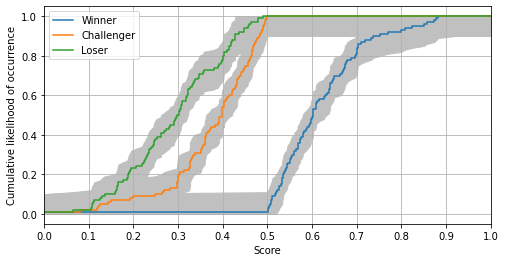

In [6]:
pa.plot_distribution_scores(
    meta_results,
    voting_rule=pa.APPROVAL
)

The gray areas represent 95% confidence intervals.

Plot the distribution (CDF) of the utility threshold (here for Approval):

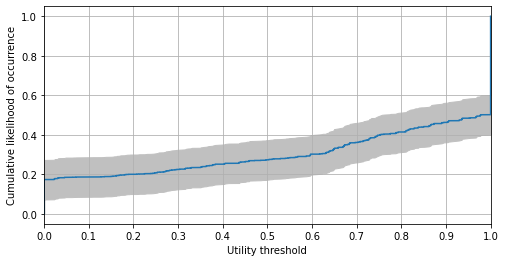

In [7]:
pa.plot_utility_thresholds(
    meta_results,
    voting_rule=pa.APPROVAL
)

Plot the distribution (CDF) of the welfare loss (for all voting rules):

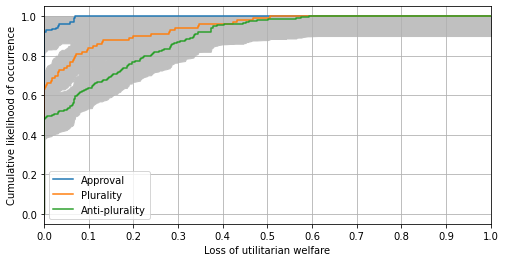

In [8]:
pa.plot_welfare_losses(
    meta_results,
    criterion='utilitarian_welfare_losses'
)

For more information, cf. the *Reference* section on Monte-Carlo fictitious play.